In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
# Load the data
data = pd.read_csv('IBM2017.csv')

In [19]:
# Ensure the 'Date' column is in datetime format and set it as the index
data['Date'] = pd.to_datetime(data['Date'])
data.set_index('Date', inplace=True)

In [20]:
# Extract temporal features
data['Year'] = data.index.year
data['Month'] = data.index.month
data['Day'] = data.index.day

In [22]:
# Prepare features and target variable
# Use temporal features and 'Volume' as features
X = data[['Year', 'Month', 'Day', 'Volume']]
y = data['Close']  # Target: closing price

In [23]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


In [24]:
# Train the LASSO model
lasso = Lasso(alpha=0.1)  # 'alpha' controls the regularization strength
lasso.fit(X_train, y_train)

Lasso(alpha=0.1)

In [25]:
# Make predictions
y_pred = lasso.predict(X_test)

In [26]:
# Evaluate performance
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.18076479445058838


In [27]:
# Print the coefficients
print(f'Coefficients: {lasso.coef_}')

Coefficients: [3.74526146e-02 3.08064957e-04 1.65484821e-03 3.57253509e-07]


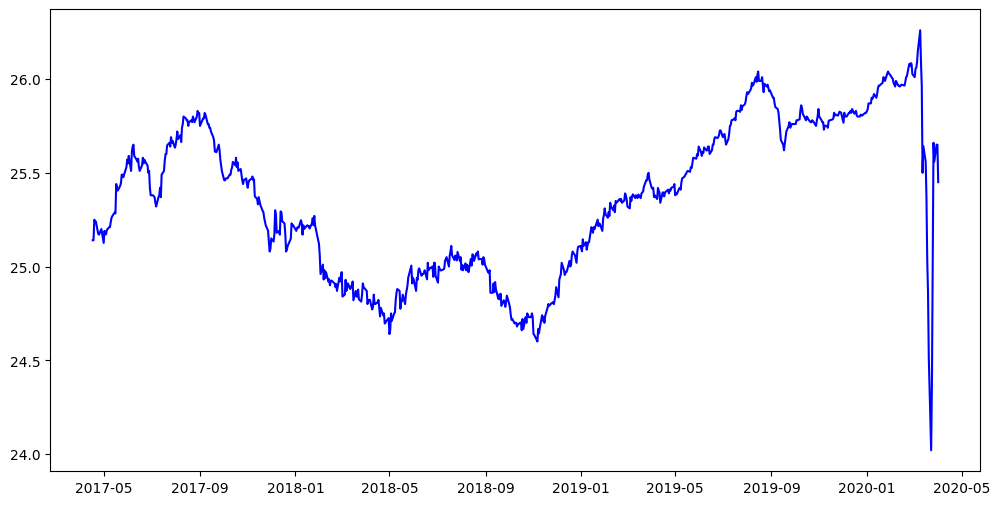

In [28]:
# Plot for visualization of results
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Close'], label='Actual Prices', color='blue')

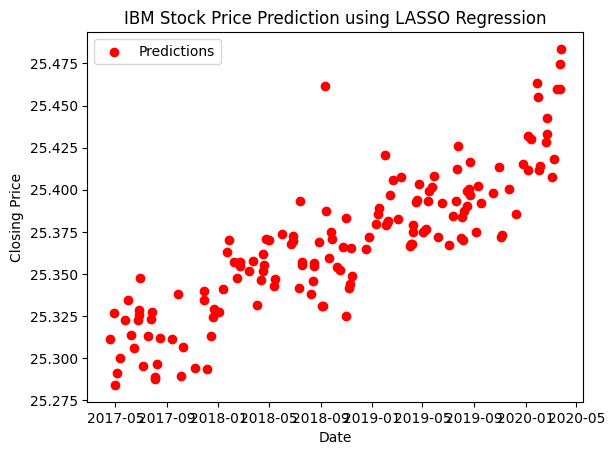

In [30]:
# Scatter plot of predictions on the test set
plt.scatter(X_test.index, y_pred, color='red', label='Predictions')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('IBM Stock Price Prediction using LASSO Regression')
plt.legend()
plt.show()

Explanation of the Code:

    Load the Data:
        Load the IBM stock data from the CSV file.

    Convert Dates and Extract Features:
        Convert the Date column to datetime format and set it as the index.
        Extract temporal features: year, month, and day from the date.
        Use the Volume feature as an additional input feature.

    Prepare Features and Target Variable:
        X includes the temporal features (Year, Month, Day) and Volume.
        y contains the closing prices.

    Split the Data:
        Divide the data into training and test sets.

    Train the LASSO Model:
        Fit the LASSO regression model on the training data.

    Make Predictions and Evaluate:
        Predict closing prices on the test set and calculate the Mean Squared Error (MSE) to assess performance.

    Plot Results:
        Plot the actual closing prices and predictions to visualize the results.

Notes:

    Adjust the alpha parameter for regularization strength based on your needs.
    The Volume feature is included as it can provide additional information relevant for prediction. You can add other features or use different feature engineering techniques to improve the model's performance.

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6ccbe74-5722-4f84-8e54-7da9a834c88a' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>